# Creating our first neural network with numpy and maths

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000

gaussian_quantiles = make_gaussian_quantiles(mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None)

X, Y = gaussian_quantiles

In [3]:
X

array([[ 0.6238196 , -0.25033018],
       [ 0.17948392, -0.01773918],
       [ 0.38964531, -0.14946344],
       ...,
       [ 0.25580389, -0.32011491],
       [-0.03679457, -0.30075765],
       [ 0.35075604,  0.17924148]])

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

In [6]:
Y = Y[:, np.newaxis]
Y.shape

(1000, 1)

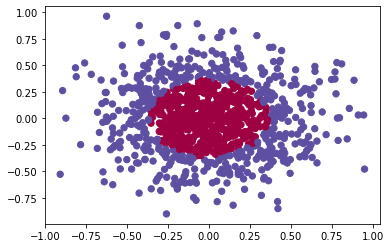

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

## Activation functions

In [8]:
def sigmoid(x, derivate=False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0  # Boolean indexing
        x[x>0] = 1
        return x
    else:
        return np.maximum(0, x)

## Loss function

In [9]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return(y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

## Neural network

In [10]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L-1):
        parameters['w' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) -1  # Weigh
        parameters['b' + str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) -1  # Bias
    return parameters

In [11]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layers_dim=layer_dims)

# Forward training

In [12]:
params['w1'].shape

(2, 4)

In [13]:
X.shape

(1000, 2)

We can make the matrix product like this:

In [14]:
np.matmul(X, params['w1'])

array([[-0.45088003, -0.3573733 , -0.65582786, -0.27236092],
       [-0.15147598, -0.06162034, -0.14841074, -0.05609593],
       [-0.28438802, -0.2179858 , -0.40452098, -0.16729136],
       ...,
       [-0.09775927, -0.31159931, -0.4302993 , -0.20088565],
       [ 0.15301095, -0.21840171, -0.19545216, -0.11335891],
       [-0.3817257 ,  0.04193411, -0.13130008, -0.02188286]])

And also with `@` as shown below

In [15]:
X@params['w1']

array([[-0.45088003, -0.3573733 , -0.65582786, -0.27236092],
       [-0.15147598, -0.06162034, -0.14841074, -0.05609593],
       [-0.28438802, -0.2179858 , -0.40452098, -0.16729136],
       ...,
       [-0.09775927, -0.31159931, -0.4302993 , -0.20088565],
       [ 0.15301095, -0.21840171, -0.19545216, -0.11335891],
       [-0.3817257 ,  0.04193411, -0.13130008, -0.02188286]])

We train our neural network

In [16]:
def train(x_data, lr, params, training=True):
    ''''
    Train a neural network with back propagation with gradient descent
    x_data: input data to be trained
    lr: learning rate
    params: dictionary of parameters
    training: whether to train or not
    '''

    ## Forward training
    params['a0'] = x_data

    params['z1'] = np.matmul(params['a0'], params['w1']) + params['b1']
    params['a1'] = relu(params['z1'])

    params['z2'] = np.matmul(params['a1'], params['w2']) + params['b2']
    params['a2'] = relu(params['z2'])

    params['z3'] = np.matmul(params['a2'], params['w3']) + params['b3']
    params['a3'] = sigmoid(params['z3'])

    output = params['a3']

    if training:
        ## Back propagation
        params['dz3'] = mse(Y, output, True) * sigmoid(params['a3'], True)
        params['dw3'] = np.matmul(params['a2'].T, params['dz3'])

        params['dz2'] = np.matmul(params['dz3'], params['w3'].T) * relu(params['a2'], True)
        params['dw2'] = np.matmul(params['a1'].T, params['dz2'])

        params['dz1'] = np.matmul(params['dz2'], params['w2'].T) * relu(params['a1'], True)
        params['dw1'] = np.matmul(params['a0'].T, params['dz1'])

        ## Gradient descent
        params['w3'] = params['w3'] - params['dw3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dw3'], axis=0, keepdims=True)) * lr

        params['w2'] = params['w2'] - params['dw2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dw2'], axis=0, keepdims=True)) * lr

        params['w1'] = params['w1'] - params['dw1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dw1'], axis=0, keepdims=True)) * lr
    return output

Like we have shown before, we make a list of the number of nodes in every layer and give them random number of weights and bias.

In [17]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layers_dim=layer_dims)
params

{'w1': array([[-0.90007384, -0.60236979,  0.67491776,  0.70795522],
        [ 0.64981302, -0.19492799,  0.43996312, -0.07801426]]),
 'b1': array([[ 0.38482274, -0.57141758,  0.29282767,  0.40560676]]),
 'w2': array([[ 0.69510293,  0.9966427 ,  0.19878301, -0.46621441,  0.63414268,
         -0.70546162,  0.35305212, -0.60210324],
        [ 0.27969631,  0.46711135, -0.77378448, -0.98311153, -0.84298162,
         -0.43194673,  0.55042893,  0.2655365 ],
        [ 0.91449406, -0.76676973,  0.60439533, -0.65443634, -0.70707229,
          0.02091116, -0.78516817, -0.08316909],
        [ 0.31407534, -0.5580308 , -0.2481049 , -0.24967402, -0.81115507,
         -0.3784972 ,  0.19102221,  0.02434647]]),
 'b2': array([[-0.26574717,  0.57605267, -0.2041731 ,  0.34487328,  0.17865098,
          0.54366564, -0.28699015, -0.58770055]]),
 'w3': array([[ 0.41333474],
        [-0.46753972],
        [-0.39524657],
        [ 0.01602418],
        [ 0.79155776],
        [ 0.23366987],
        [ 0.47711997],


Now, lets see how the error changes in every iteration. You can change the parameters of the iterations and learning rate and see how change the error in the graph.

In [18]:
errors = []

## Actually training with 30,000 iterations
for _ in range(20000):
    output = train(X, 0.0001, params)
    if _ % 50 == 0:
        print(mse(Y, output))
        errors.append(mse(Y, output))

0.24553238295294422
0.24252682701112482
0.23978135908227075
0.23709431652187649
0.23436321614866576
0.23181099248346096
0.22954042258591018
0.22738618228095941
0.22533902150862814
0.22337063719955216
0.2214414158371021
0.21953988094933935
0.2176271423758532
0.21574840822270852
0.2139132303649883
0.2121042245278581
0.21035703305567463
0.20866775623081113
0.20700263197660257
0.20536896505898458
0.2037648927196229
0.20218101075567568
0.20062755431154147
0.19910738139623924
0.19760842826108588
0.1961439822503803
0.19471444797029425
0.193333291839072
0.19196796261034457
0.1906460561703753
0.1893807972042461
0.18816651229804943
0.1869741845630213
0.18581141024858588
0.1847072902369379
0.183669293211862
0.18267761378316902
0.18169524619020944
0.1807517926226942
0.17979981880876303
0.17888643919077288
0.1780049645061435
0.1771411278976616
0.1763124348492454
0.17551825413299627
0.1747544904639234
0.17401520798588235
0.17329881722466955
0.17260992141541834
0.17195104202556458
0.1713306827384193


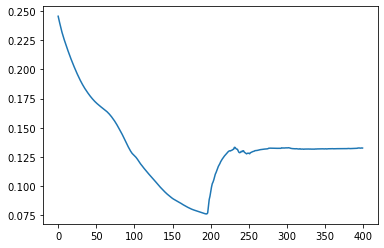

In [19]:
plt.plot(errors)

## Testing our model

In [20]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test, 0.0001, params, training=False)

In [21]:
y = np.where(y >= 0.5, 1, 0)
y

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

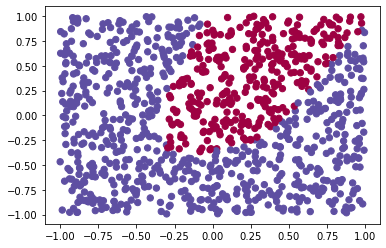

In [22]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)